In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import scipy as sp # type: ignore
from scipy.optimize import curve_fit # type: ignore
import matplotlib.pyplot as plt # type: ignore

#Functional API
import tensorflow as tf # type: ignore
from tensorflow import keras # type: ignore
from keras.models import Model # type: ignore
import keras.optimizers # type: ignore
from keras.layers import Dense, Input # type: ignore

# UNITS
ev2au = 1/27.211396132
au2ev = 27.211396132
ang2au = 1/0.529177249
au2ang = 0.529177249
au2fs = 1/41.34137333656
fs2au = 41.34137333656
au2debye = 1/0.39343
debye2au = 0.39343
au2nm = 0.052917720859
nm2au = 1/0.052917720859
au2cm1 = 2.1947463137E5
cm12au = 1/(2.1947463137E5)
au2amu = 1/1822.88848325
amu2au = 1822.88848325
thz2au = 1.0/0.029979/au2cm1

2025-05-18 17:36:32.562294: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 17:36:32.829665: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 17:36:33.076814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747604193.321360    3330 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747604193.377578    3330 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#La suma debe ser una suma de 32 terminos

coeff_matrix = np.zeros((32,4))
coeff_matrix[0,:] = [0,0,1,32849.58]
coeff_matrix[1,:] = [0,1,1,-17553.99]
coeff_matrix[2,:] = [1,0,1,-27625.23]
coeff_matrix[3,:] = [2,0,0,50043.09]
coeff_matrix[4,:] = [4,0,0,336.49]
coeff_matrix[5,:] = [0,1,2,-3360.94]
coeff_matrix[6,:] = [0,3,0,-64.84]
coeff_matrix[7,:] = [1,1,1,18285.40]
coeff_matrix[8,:] = [2,0,1,-7181.44]
coeff_matrix[9,:] = [0,0,4,2553.25]
coeff_matrix[10,:] = [0,2,2,-4905.39]
coeff_matrix[11,:] = [0,4,0,3505.21]
coeff_matrix[12,:] = [1,1,2,-21845.86]
coeff_matrix[13,:] = [1,3,0,-1416.44]
coeff_matrix[14,:] = [2,1,1,5596.86]
coeff_matrix[15,:] = [3,0,1,-142.39]
coeff_matrix[16,:] = [0,0,2,15623.64]
coeff_matrix[17,:] = [0,2,0,72972.84]
coeff_matrix[18,:] = [1,1,0,9857.17]
coeff_matrix[19,:] = [3,0,0,-2376.30]
coeff_matrix[20,:] = [0,2,1,-8550.95]
coeff_matrix[21,:] = [1,0,2,-4597.25]
coeff_matrix[22,:] = [1,2,0,-657.28]
coeff_matrix[23,:] = [2,1,0,1985.36]
coeff_matrix[24,:] = [0,1,3,-5546.12]
coeff_matrix[25,:] = [0,3,1,-11098.50]
coeff_matrix[26,:] = [1,0,3,-9178.03]
coeff_matrix[27,:] = [1,2,1,948.74]
coeff_matrix[28,:] = [2,0,2,-983.04]
coeff_matrix[29,:] = [2,2,0,-584.78]
coeff_matrix[30,:] = [3,1,0,1694.77]
coeff_matrix[31,:] = [0,0,3,4971.79]

def V(R1,R2,theta):
    R1e = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
    R2e = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
    alpha_1 = 1.95/ang2au #Amstrong^-1
    alpha_2 = 2.34/ang2au #Amstrong^-1
    theta_e = np.pi #Degrees

    aR1 = -alpha_1*(R1-R1e)
    aR2 = -alpha_2*(R2-R2e)

    y_1 = 1.0 - np.exp(aR1)
    y_2 = 1.0 - np.exp(aR2)
    y_3 = np.cos(theta) - np.cos(theta_e)

    suma = 0.0
    for i in range(32):
        suma = suma + (coeff_matrix[i,3]*cm12au)*(y_1**int(coeff_matrix[i,0]))*(y_2**int(coeff_matrix[i,1]))*(y_3**(coeff_matrix[i,2]))
    return(suma)

Text(0.5, 1.0, 'Potenciales de energia de superficie')

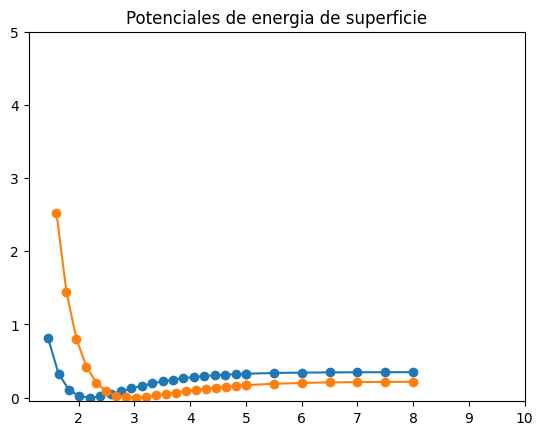

In [3]:
q1 = np.concatenate((np.linspace(1.45,5.0,20),np.linspace(5.0, 8, 7))) #Azul
q2 = np.concatenate((np.linspace(1.6,5.0,20),np.linspace(5.0, 8, 7))) #Naranja
R1_eq = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
R2_eq = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
theta_eq = np.pi
plt.plot(q1, V(R1_eq,q1,theta_eq), "o-")
plt.plot(q2, V(q2,R2_eq,theta_eq), "o-")
plt.axis([1.1,10,-0.05,5])
plt.title("Potenciales de energia de superficie")

In [4]:
print(V(R1_eq,7.5,np.pi))
print(V(7.5,R2_eq,np.pi))

0.3471562712767736
0.21480652798375546


Text(0.5, 1.0, 'Gráfico de Contorno de Energía de Superficie')

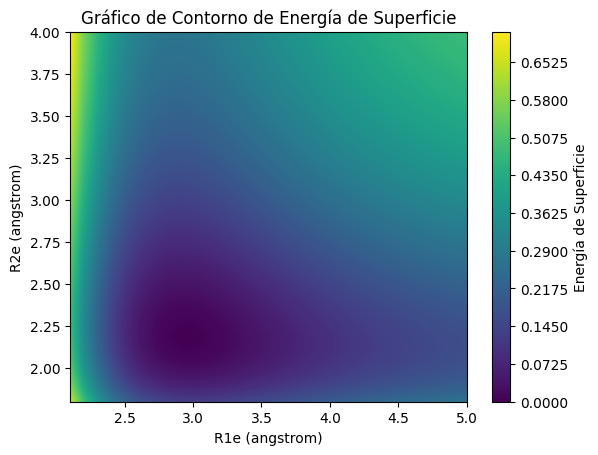

In [5]:
R1e_values = np.linspace(2.1, 5, 29)
R2e_values = np.linspace(1.8, 4, 29) 

R1e, R2e = np.meshgrid(R1e_values, R2e_values)
energia_superficie = np.vectorize(V)(R1e, R2e, np.pi) #np.vectorize para aplicar la función a matrices

plt.contourf(R1e, R2e, energia_superficie,300)
plt.colorbar(label='Energía de Superficie')

plt.xlabel('R1e (angstrom)')
plt.ylabel('R2e (angstrom)')
plt.title('Gráfico de Contorno de Energía de Superficie')

In [6]:
# Generacion del archivo de datos
data_set = np.zeros((len(q1)**2,3)) #Dim(729,3)
l = 0 #Inicializa en 0
for i in range(len(q1)): #R1
    for j in range(len(q2)): #R2
        data_set[l,:] = q1[i],q2[j],V(q1[i],q2[j],np.pi) #Obtenemos valores para R1, R2 y V(R1,R2)
        l = l + 1

df = pd.DataFrame(data_set)
df.to_csv('PotencialOCS_2.csv')
df.columns = ['R1','R2','V'] #Renombramos las columnas

In [7]:
inputsmodel = df.drop('V', axis=1)
target = df.iloc[:,-1]

In [8]:
#Creamos una funcion custom_loss incluyendo la perdida fisica de la pinn.
from scipy.optimize import curve_fit # type: ignore

def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0

xdata = np.concatenate((np.linspace(1.6,5.0,30),np.linspace(5.0, 8, 7))) #q2
morse_parameters = np.zeros((len(q1),5))

for i in range(len(q1)): #En este range cambio la forma de graficar
    ydata = V(q1[i],xdata,theta_eq) #Potencial segun xdata
    popt, pcov = curve_fit(morsepotential, xdata, ydata, p0=[3.49440974e-01,  1.22952512e+00, -1.73828756e-03    ,  2.18903764e+00]) #Se hace el fitting considerando un p0 inicial para el resto
    
    morse_parameters[i,0] = q1[i]
    morse_parameters[i,1:] = popt
    
    #plt.title("Fitting de curvas morse en parametros de q2")
    #plt.plot(xdata, morsepotential(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % 
    #tuple(popt)) #Ploteo todos los popt calculados segun el ciclo for
    
    dfMorse = pd.DataFrame(morse_parameters[:]) #Creo el dataset de los valores
    dfMorse.columns = ['q','D','alpha','E','Req']

dfaxu = pd.DataFrame(dfMorse.loc[dfMorse.index.repeat(27)].reset_index(drop=True))
dfFinal = pd.concat([df,dfaxu],axis=1)

In [9]:
fit_v = []

for i, row, in dfFinal.iterrows():
    R2 = row['R2']
    D = row['D']
    alpha = row['alpha']
    E = row['E']
    Req = row['Req']
    
    potential = morsepotential(R2,D,alpha,E,Req)
    fit_v.append(potential)
    
dfFinal['VFitting'] = fit_v

## Loss: Fitting Potential Values + $\lambda = 0.01$
En pinnLoss se cambia (y_pred - lossRi) por (y_pred - lossV) para variar entre morse y potencial de fitting

In [10]:
def custom_loss(target, y_pred):
    lossV = dfFinal['VFitting']

    pinnLoss = tf.math.reduce_mean(tf.square(y_pred - lossV))
    pinnLoss_tf = tf.convert_to_tensor(pinnLoss, dtype=tf.float32)

    mse_loss = tf.math.reduce_mean(tf.square(y_pred - target))
    mse_loss_tf = tf.convert_to_tensor(mse_loss, dtype=tf.float32)
    numlambda = 0.1
    totalloss = mse_loss_tf + numlambda*pinnLoss_tf
    return totalloss

# Creacion de modelos replicados para comparacion de resultados $(m=5)$

In [ ]:
tf.random.set_seed(5)
np.random.seed(5)
eplist = [400, 700, 1000]
pv = 0.20

loss_histories = {}
y_preds = {}
models = []
histories = []



for epochs in eplist:
    print(f"Entrenando modelo con {epochs} épocas")
    inputs1 = Input(shape=(2,))
    hidden11 = Dense(75, activation='relu')(inputs1)
    hidden12 = Dense(100, activation='relu')(hidden11)
    hidden13 = Dense(100, activation='relu')(hidden12)
    hidden14 = Dense(100, activation='relu')(hidden13)
    hidden15 = Dense(100, activation='relu')(hidden14)
    hidden16 = Dense(100, activation='relu')(hidden15)
    hidden17 = Dense(90, activation='relu')(hidden16)
    output1 = Dense(1, activation='linear')(hidden17)
    model1 = Model(inputs=inputs1, outputs=output1)

    opt1 = keras.optimizers.RMSprop(learning_rate=0.01)
    model1.compile(optimizer=opt1, loss=custom_loss, metrics=['mae'], shuffle=False)

    history = model1.fit(inputsmodel, target, epochs=epochs, validation_split=pv, batch_size=480)
    loss_histories[epochs] = history.history
    y_preds[epochs] = model1.predict(inputsmodel)

    v_true = df['V'].to_numpy().reshape(-1)
    v_pred = y_preds[epochs].reshape(-1)

    np.save(f'TrainFOR_'+'ep:'+str(epochs)+'.npy', np.array([history.history['val_loss'],history.history['loss']]))
    np.save(f'ResultsFOR_'+'ep:'+str(epochs)+'.npy', np.stack([v_true, v_pred], axis=1))

    #models.append(model1)
    #histories.append(history)


#history = model.fit(inputsmodel, target, epochs=ep, validation_split=pv, batch_size=480)
#loss_histories[lr] = history.history
#y_preds[lr] = model.predict(inputsmodel)

# Optimizer.
# Learning-Rate.
# Activation functions.
# Number of layers.
# Find a pattern for the number of neurons per layer.


# Como mejora la regression o la predicción con PINN. 


Entrenando modelo con 400 épocas


2025-05-18 17:36:41.399493: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - loss: 319.4597 - mae: 6.1086 - val_loss: 0.4744 - val_mae: 0.5836
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 1.3622 - mae: 0.7269 - val_loss: 11.7289 - val_mae: 3.2398
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 6.2588 - mae: 2.1605 - val_loss: 0.1379 - val_mae: 0.2238
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 1.0256 - mae: 0.4800 - val_loss: 0.3577 - val_mae: 0.5176
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.8528 - mae: 0.5819 - val_loss: 0.2770 - val_mae: 0.4413
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.8198 - mae: 0.5794 - val_loss: 0.1740 - val_mae: 0.3134
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.7814 - mae: 0.5554 - val_loss: 0.1382 - val_mae: 0.2469
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.7719 - mae: 0.5688 - val_loss: 0.0989 - val_mae: 0.1538
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.72

In [12]:
for i, history in enumerate(histories):
    final_loss = history.history['loss'][-1]
    print(f"Modelo {i+1} con {eplist[i]} épocas terminó con pérdida: {final_loss:.5f}")

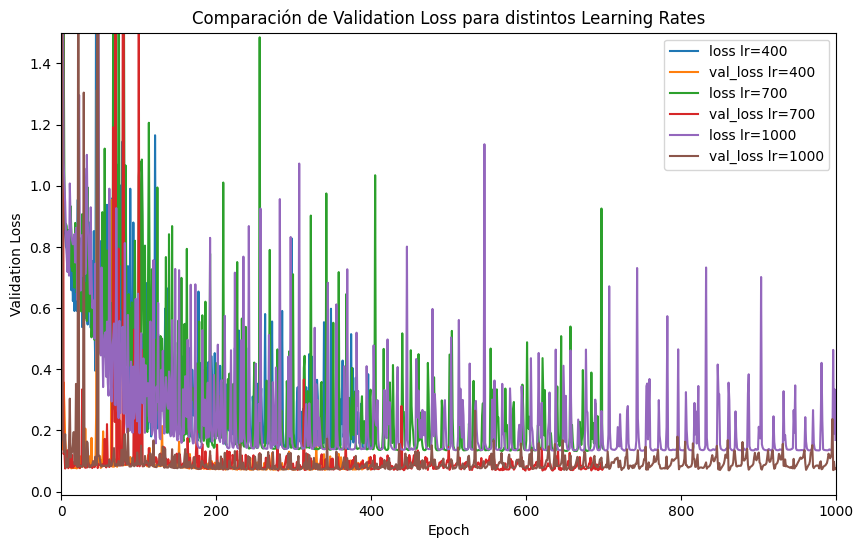

In [13]:
plt.figure(figsize=(10,6))
for lr, history in loss_histories.items():
    plt.plot(history['loss'], label=f'loss lr={lr}')
    plt.plot(history['val_loss'], label=f'val_loss lr={lr}')
plt.axis([0, epochs, -0.01, 1.5])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Comparación de Validation Loss para distintos Learning Rates')
plt.legend()
plt.show()

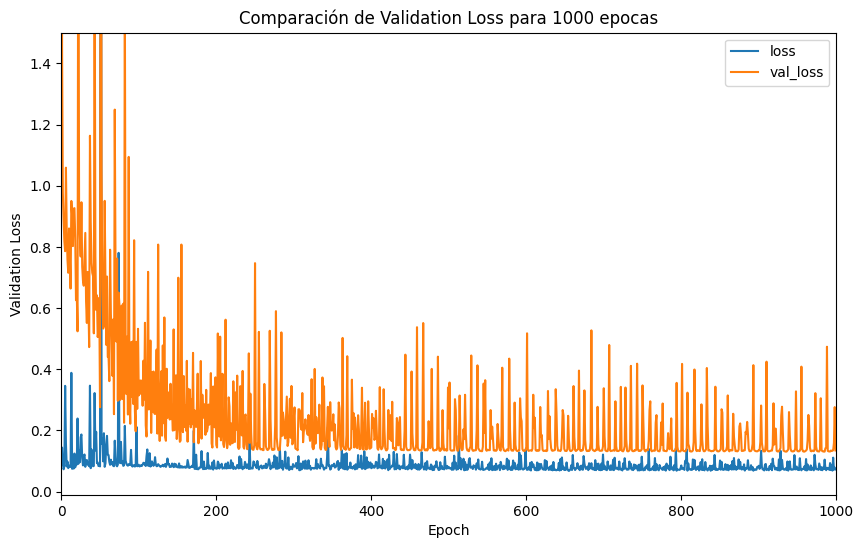

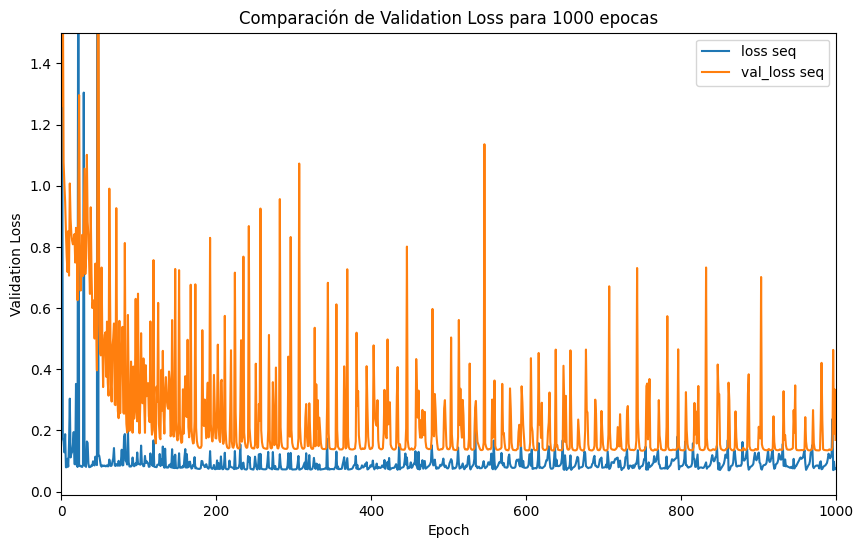

In [14]:
test1000 = np.load('Epochs/TrainRES_EP_0.01_EPs1000_VSplit0.2.npy')
seq1000 = np.load('TrainFOR_ep:1000.npy')

plt.figure(figsize=(10,6))
plt.plot(test1000[0,:], label=f'loss')
plt.plot(test1000[1,:], label=f'val_loss')
plt.axis([0, epochs, -0.01, 1.5])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title(f'Comparación de Validation Loss para {epochs} epocas')    
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(seq1000[0,:], label=f'loss seq')
plt.plot(seq1000[1,:], label=f'val_loss seq')
plt.axis([0, epochs, -0.01, 1.5])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title(f'Comparación de Validation Loss para {epochs} epocas')    
plt.legend()
plt.show()


#plt.scatter(seq1000[0,:], seq1000[1,:], label=f'1000 Epochs', linewidth=1.5)
#plt.plot(test1000[0,:],test1000[0,:])


,0,1
0,4.769169,4.379094
1,4.140660,3.995638
2,3.909743,3.861403
3,3.836615,3.826224
4,3.824288,3.827018
...,...,...
724,0.654842,0.675462
725,0.696146,0.696146
726,0.753584,0.809165
727,0.831838,0.841302


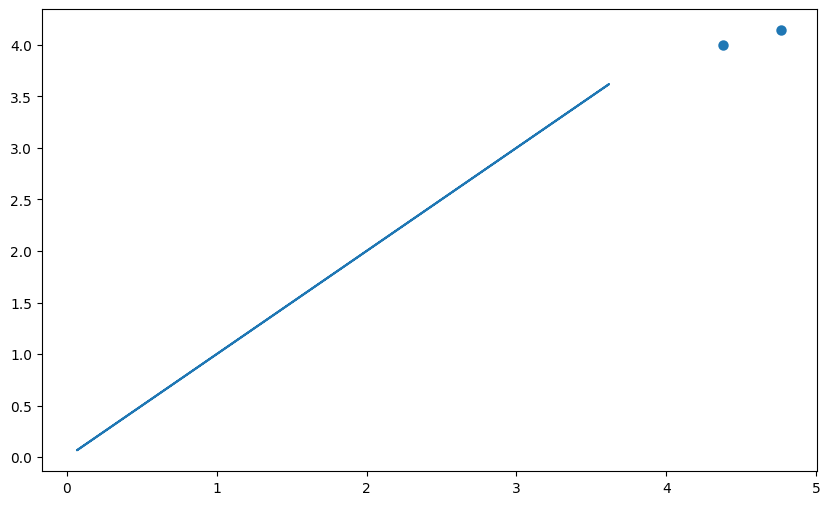

In [ ]:
import pandas as pd
pred1000 = np.load('Epochs/TrainPREDS_EP_0.01_EPs1000_VSplit0.2.npy')
pseq1000 = np.load('ResultsFOR_ep1000.npy')

datos = model.predict_on_batch(inputsmodel) #Estudiar esto
aa= datos.tolist()
lista = []
for i in range(len(aa)):
    lista.append(aa[i][0])
df1 = pd.DataFrame()
df1['predicted'] = lista
df1





plt.figure(figsize=(10,6))






plt.scatter(preddf.iloc[0,:], preddf.iloc[1,:], label=f'1000 Epochs', linewidth=1.5)
plt.plot(test1000[0,:],test1000[0,:])

#seqdf = pd.DataFrame(pseq1000)
#preddf = pd.DataFrame((pred1000).reshape(-1,2)) 

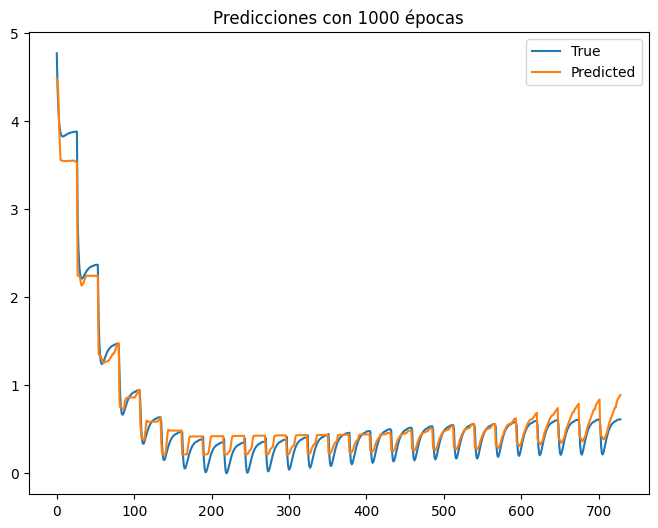

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(v_true, label='True')
plt.plot(v_pred, label='Predicted')
plt.legend()
plt.title(f"Predicciones con {epochs} épocas")
plt.show()


In [33]:
# El entorno se ha reiniciado, volvemos a cargar el archivo
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo de predicciones
data = np.load("ResultsFOR_ep:1000.npy")

# Separar datos reales y predichos
v_true = data[:, 0]
v_pred = data[:, 1]

# Mostrar formas y primeros valores para verificar
v_true[:5], v_pred[:5], v_true.shape, v_pred.shape


(array([4.76916883, 4.37909439, 4.14065963, 3.99563826, 3.90974277]),
 array([4.4777894 , 4.46170473, 4.2956109 , 3.97613859, 3.71542978]),
 (729,),
 (729,))

In [16]:
#np.save('training_results_lr_'+str(lr)+'_epochs_'+str(epochs)+'_vsplit'+str(pv)+'.npy',np.array([history['val_loss'],history['loss']]))
#np.save('training_predictions_lr_'+str(lr)+'_epochs_'+str(epochs)+'_vsplit'+str(pv)+'.npy',np.array([df['V'],lista]))

#np.save('TrainFOR_'+'ep:'+str(epochs)+'.npy', np.array([history['val_loss'],history['loss']]))
#np.save('ResultsFOR_'+'ep:'+str(epochs)+'.npy', np.array([df['V'],lista]))

#test = np.load('test.npy')
#plt.plot(test[0,:])
#plt.plot(test[1,:])
#plt.axis([0, ep, -0.01, 1.5])
#plt.xlabel('Epoch')
#plt.ylabel('Validation Loss')
#plt.title('Comparación de Validation Loss para distintos Learning Rates')
#plt.legend()